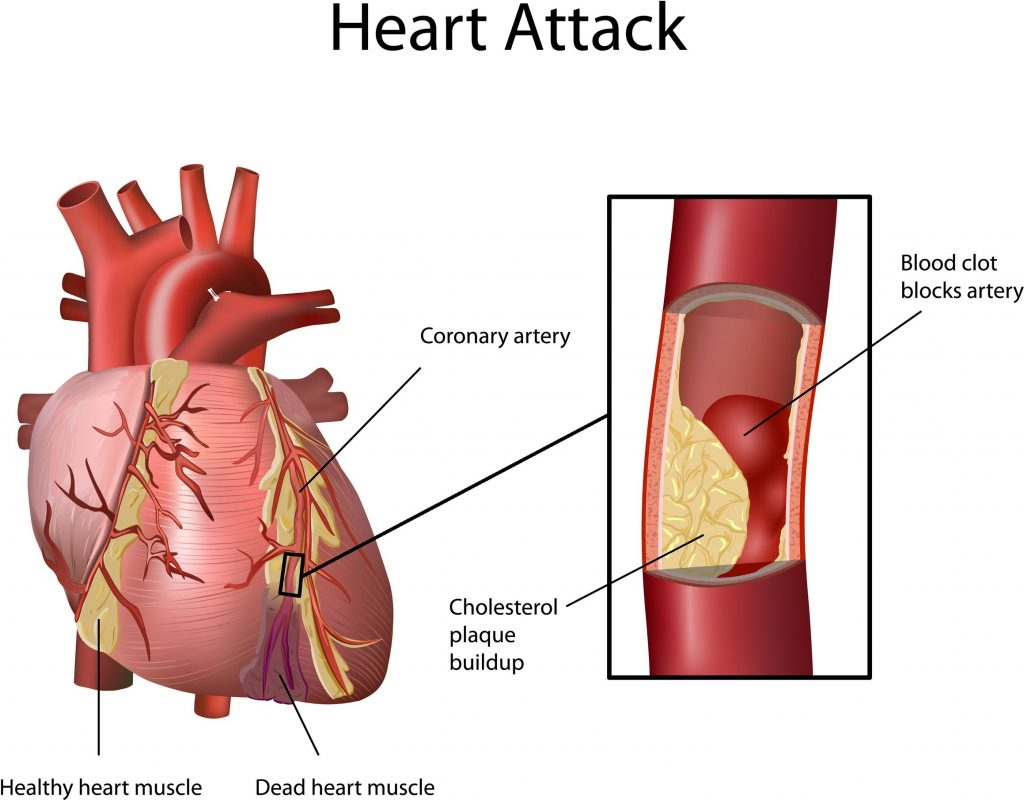

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### The risk of a heart attack, also known as myocardial infarction, is influenced by various factors. Here are some of the common risk factors associated with heart attacks:

#### Age: 
As individuals age, the risk of heart attacks increases. Men above the age of 45 and women above the age of 55 are considered to be at higher risk.

#### Gender:
 Men generally have a higher risk of heart attacks compared to premenopausal women. However, after menopause, the risk for women increases and becomes similar to that of men.

#### Family History: 
Having a close family member, such as a parent or sibling, who has had a heart attack or coronary artery disease (CAD) can increase your risk.

#### High Blood Pressure: 
Hypertension, or high blood pressure, is a significant risk factor for heart attacks. The increased pressure in the blood vessels puts strain on the heart and can lead to heart disease.

#### High Cholesterol:
 Elevated levels of LDL cholesterol (often referred to as "bad" cholesterol) and triglycerides can contribute to the formation of plaque in the arteries, leading to a higher risk of heart attacks.

#### Smoking:
 Cigarette smoking is a major risk factor for heart disease, including heart attacks. It damages blood vessels, reduces oxygen supply to the heart, and increases the formation of blood clots.

#### Diabetes: 
 Individuals with diabetes are at an increased risk of heart attacks due to the impact of high blood sugar levels on blood vessels and the heart.

#### Obesity:
 Excess weight, particularly around the waist, increases the risk of heart attacks. Obesity contributes to other risk factors such as high blood pressure, diabetes, and high cholesterol.

#### Sedentary Lifestyle: 
 Lack of regular physical activity and a sedentary lifestyle can increase the risk of heart attacks. Exercise helps maintain heart health, control weight, and improve overall cardiovascular fitness.

#### Stress and Mental Health:
 Chronic stress, depression, and anxiety can have an impact on heart health and increase the risk of heart attacks.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Heart Attack Risk Prediction/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Data Anylysis

In [7]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


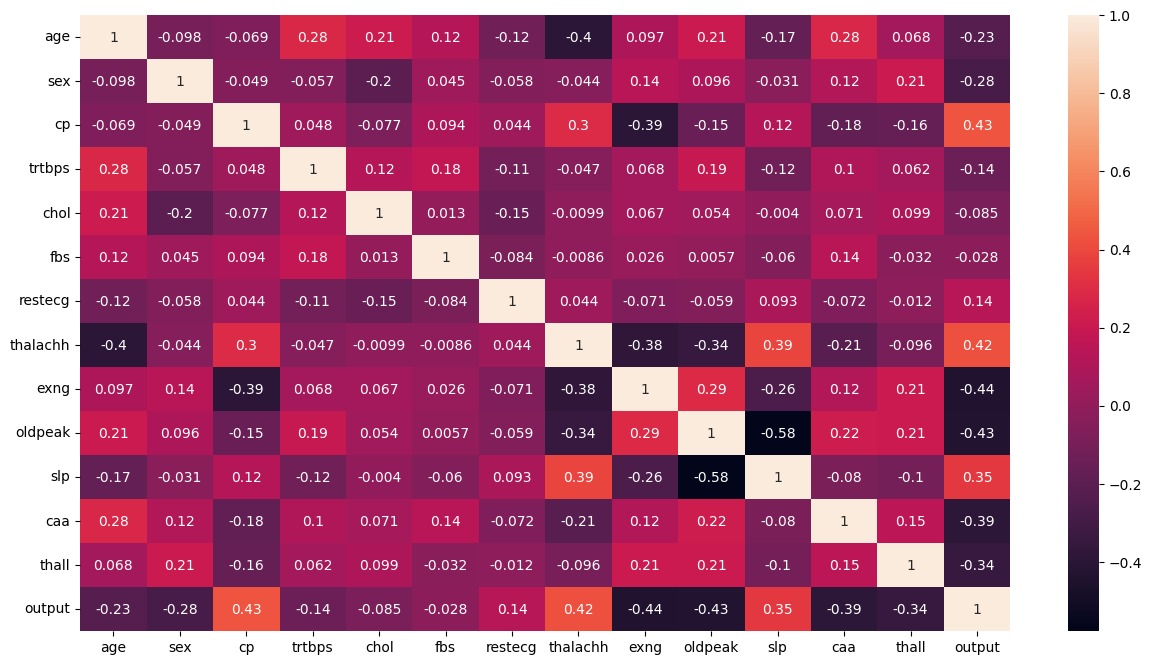

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Uni-variate and Bi-variate analysis on our features

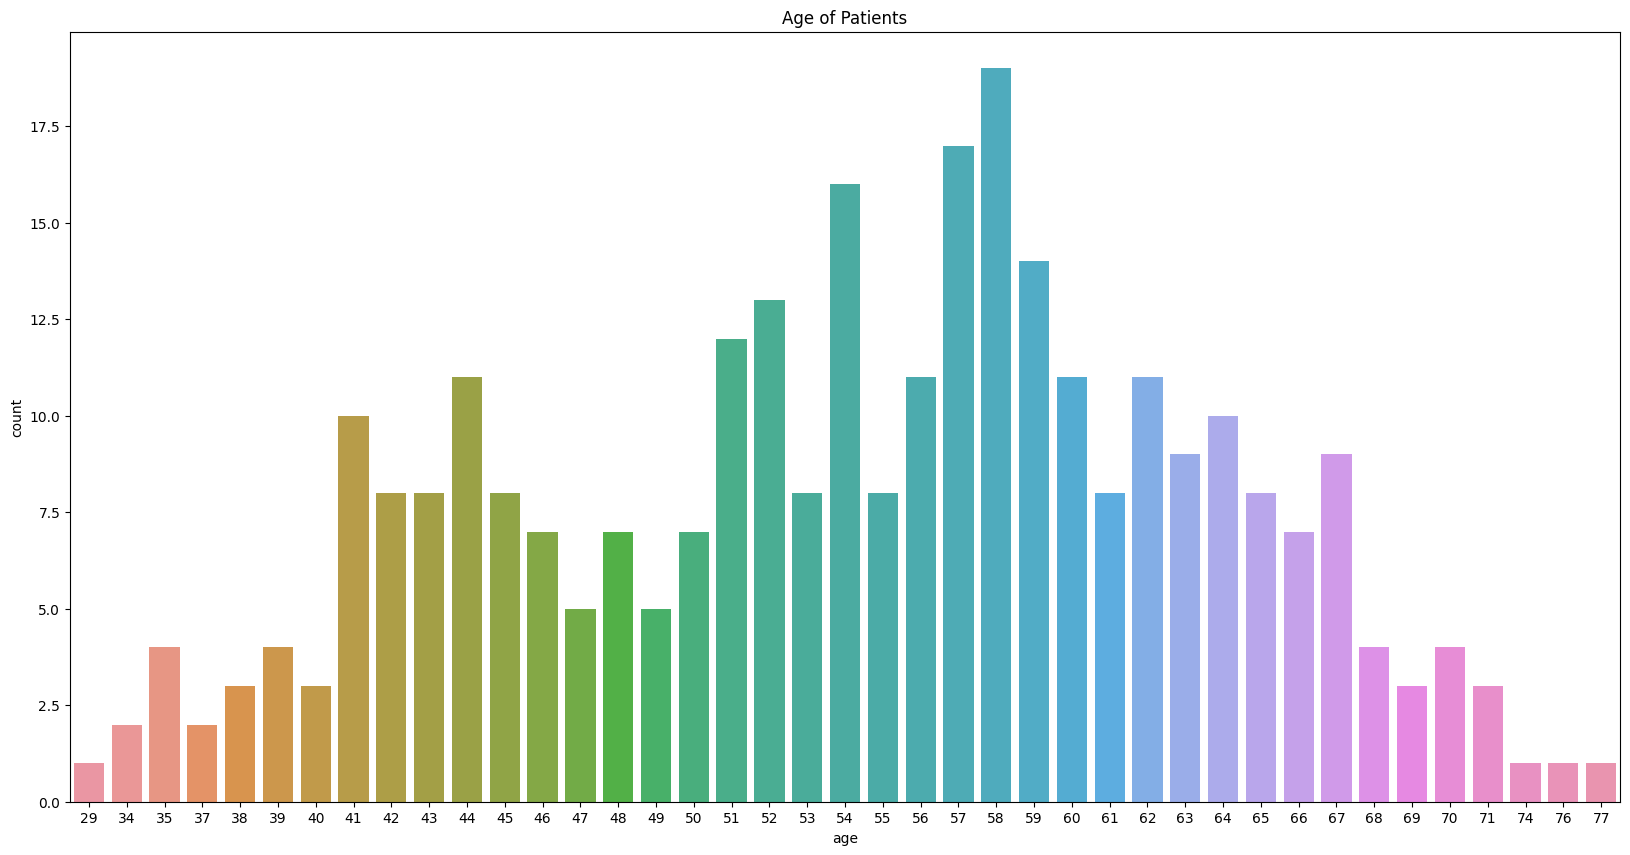

In [9]:
plt.figure(figsize=(20,10))
plt.title('Age of Patients')
plt.xlabel('Age')
sns.countplot(data=df,x='age')
plt.show()

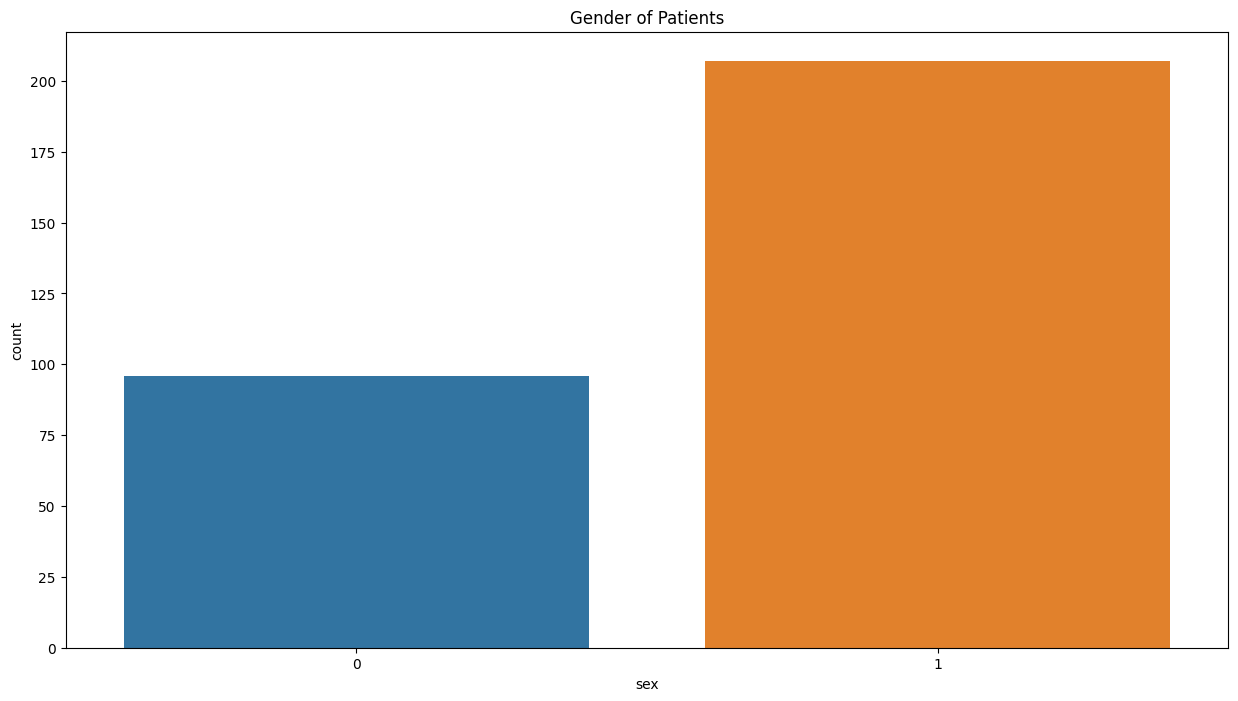

In [10]:
plt.figure(figsize=(15,8))
plt.title('Gender of Patients')
plt.xlabel('Age')
sns.countplot(data=df,x='sex')
plt.show()

In [11]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [12]:
cp_data = df['cp'].value_counts().reset_index()
cp_data['index'][3] = 'asmptomatic'
cp_data['index'][2] = 'non-anginal'
cp_data['index'][1] = 'Atyppical Anigma'
cp_data['index'][0] = 'Typical Anigma'

In [13]:
cp_data

,index,cp
0,Typical Anigma,143
1,Atyppical Anigma,87
2,non-anginal,50
3,asmptomatic,23


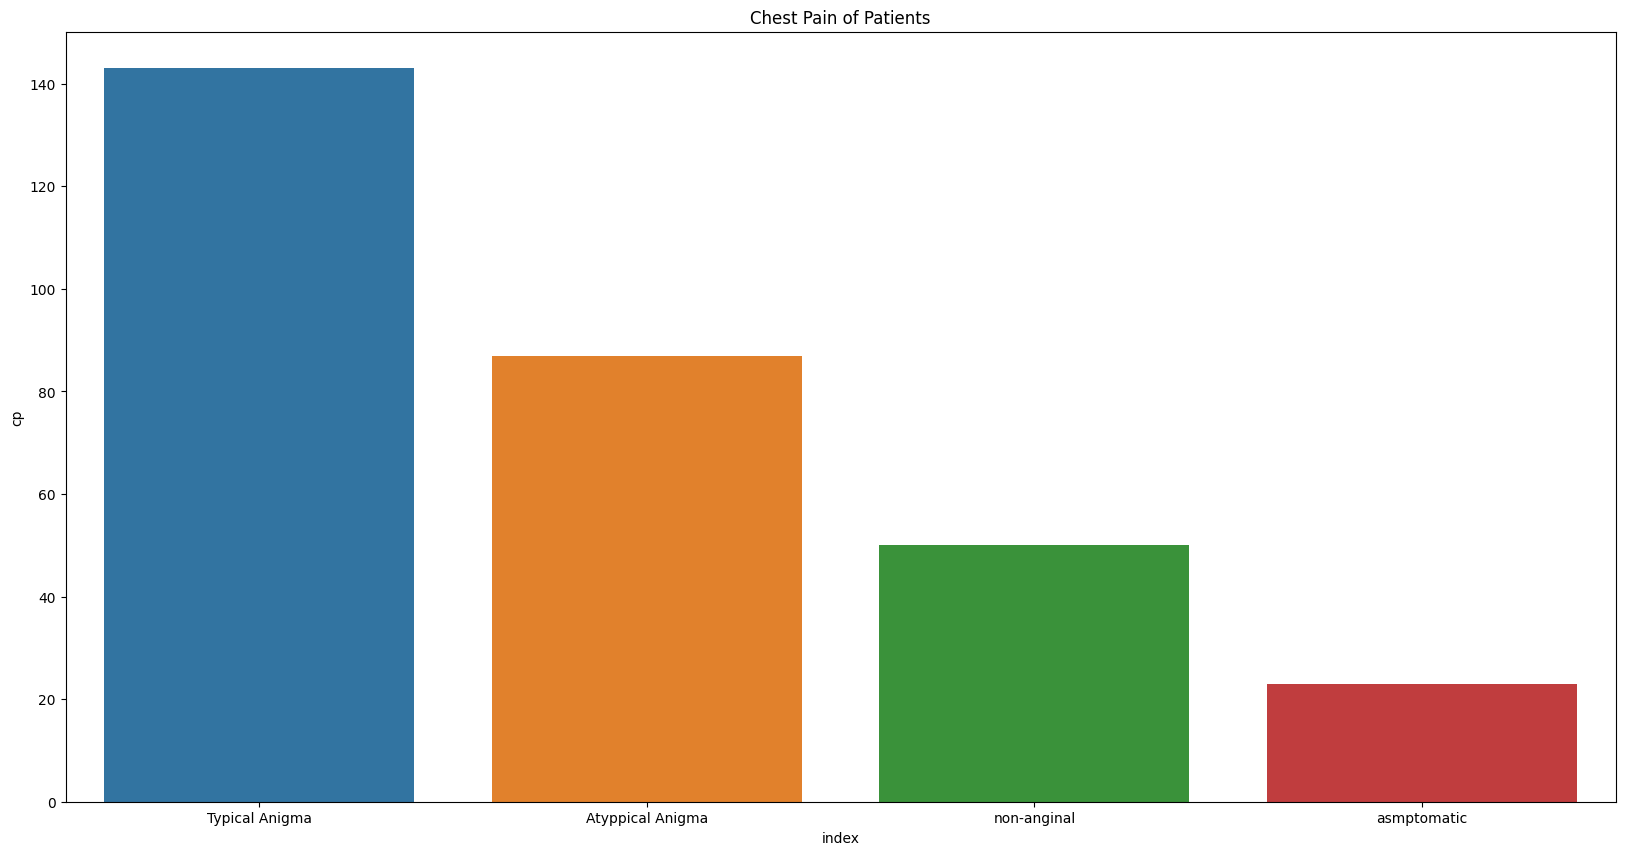

In [14]:
plt.figure(figsize=(20,10))
plt.title('Chest Pain of Patients')
sns.barplot(data=cp_data,x ='index',y='cp')
plt.show()

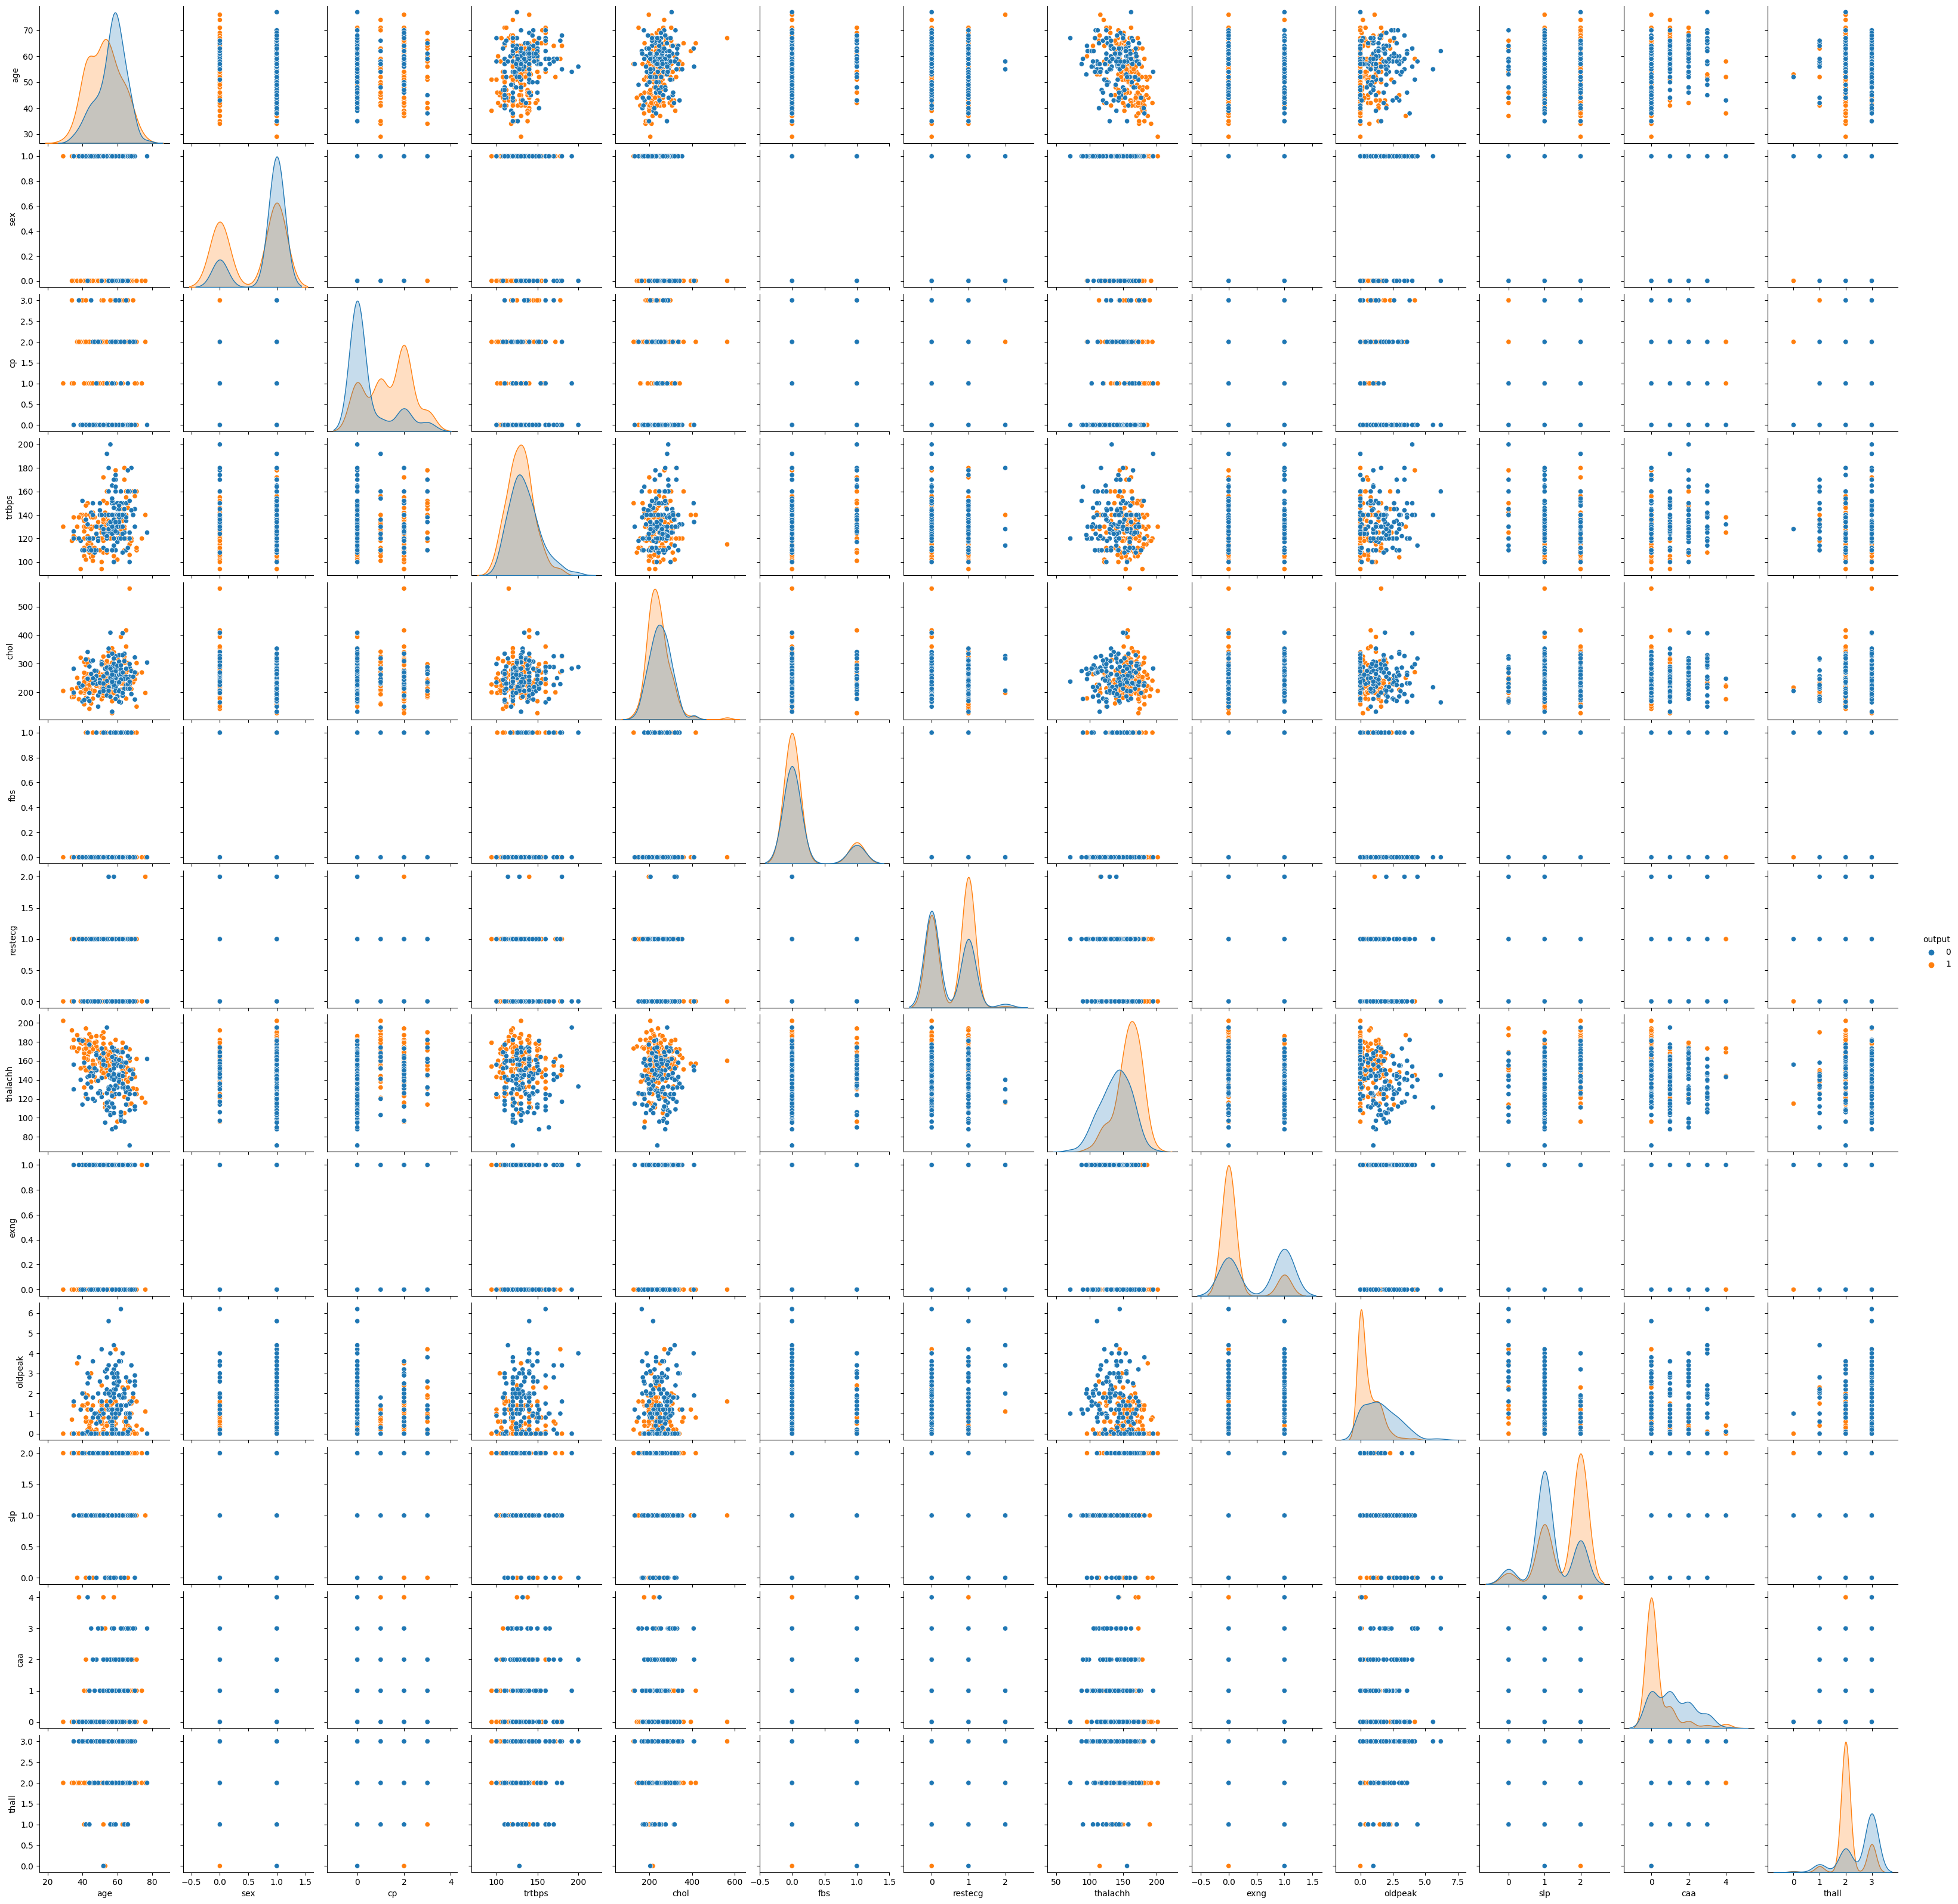

In [15]:
sns.pairplot(hue='output',data=df)
plt.show()

<ipython-input-16-dea254da9e66>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trtbps'],kde=True,color='magenta')
<ipython-input-16-dea254da9e66>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['thalachh'],kde=True,color='teal')


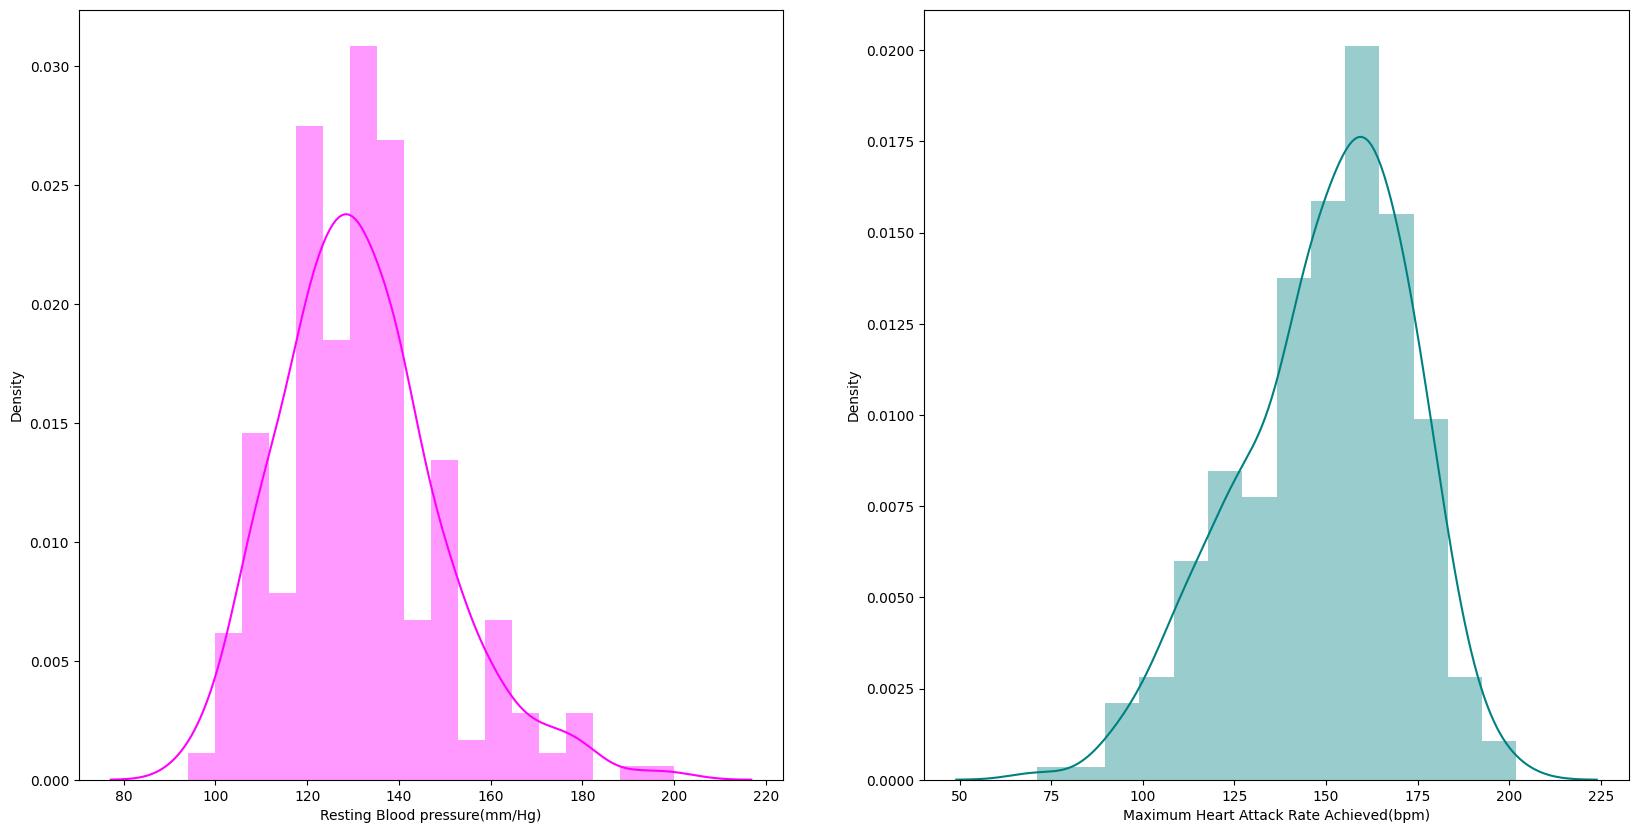

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(df['trtbps'],kde=True,color='magenta')
plt.xlabel('Resting Blood pressure(mm/Hg)')
plt.subplot(1,2,2)
sns.distplot(df['thalachh'],kde=True,color='teal')
plt.xlabel('Maximum Heart Attack Rate Achieved(bpm)')
plt.show()

<ipython-input-17-a26cb35a089a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['chol'],kde=True,color='red')


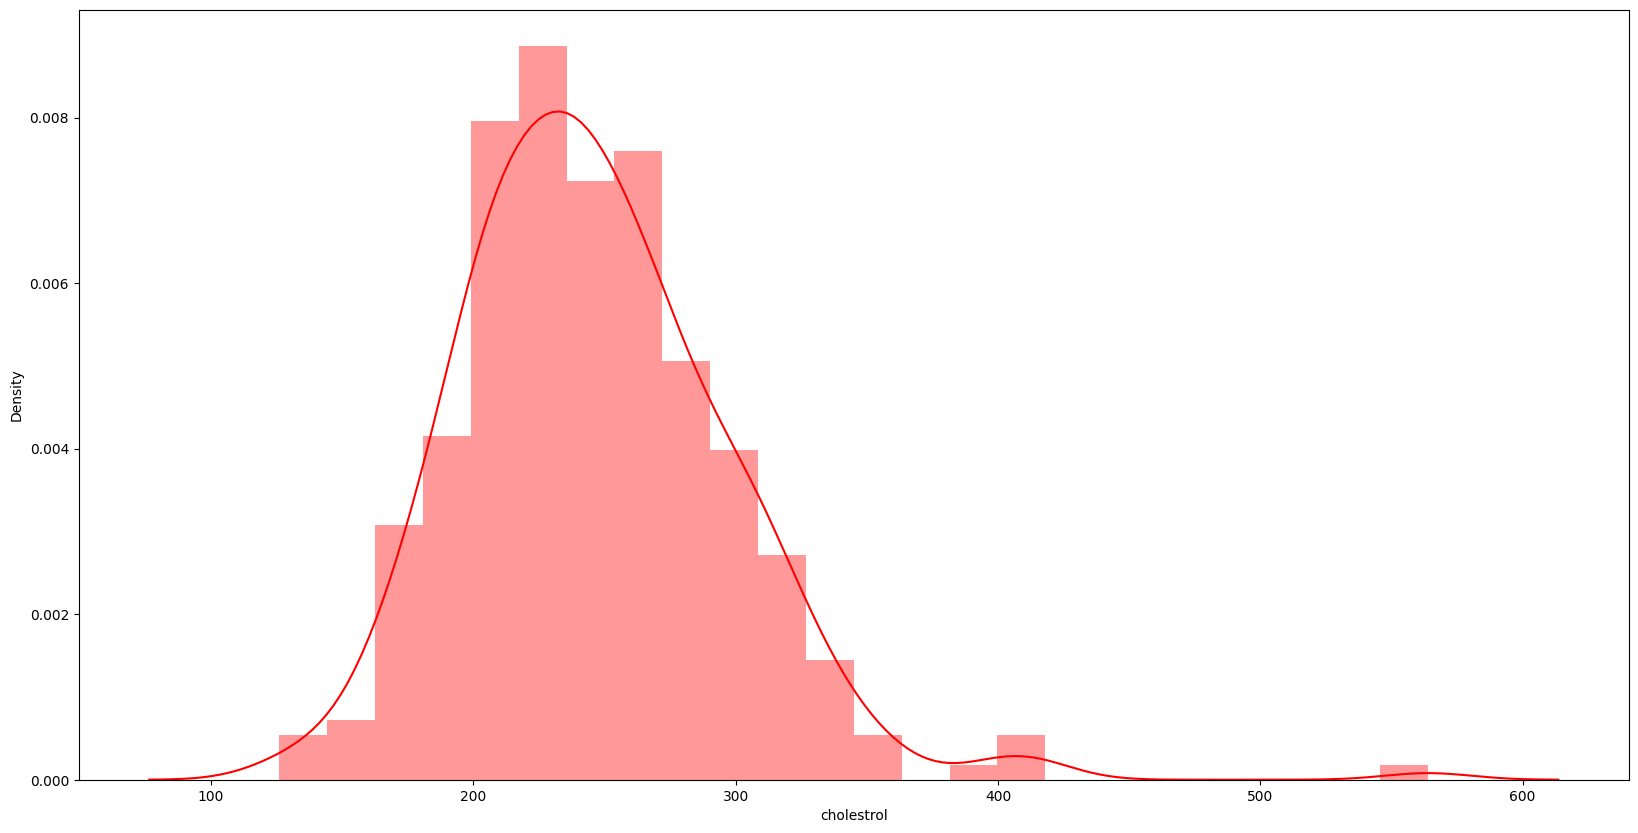

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(df['chol'],kde=True,color='red')
plt.xlabel('cholestrol')
plt.show()


In [18]:
df = df.drop(['oldpeak','thall','slp'],axis=1)

In [19]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,63,1,3,145,233,1,0,150,0,0,1
1,37,1,2,130,250,0,1,187,0,0,1
2,41,0,1,130,204,0,0,172,0,0,1
3,56,1,1,120,236,0,1,178,0,0,1
4,57,0,0,120,354,0,1,163,1,0,1


# Standardisation

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
scaler.fit(df)

StandardScaler()

In [24]:
df = scaler.transform(df)

In [25]:
df = pd.DataFrame(df,columns=['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','caa','output'])

In [26]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,caa,output
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,-0.714429,0.914529
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,-0.714429,0.914529
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,-0.714429,0.914529
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.714429,0.914529
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.714429,0.914529


In [27]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [28]:
X.shape,Y.shape

((303, 10), (303, 1))

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=101)

# Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
LE = LabelEncoder()
encoded_y = LE.fit_transform(y_train)
logreg = LogisticRegression()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
logreg.fit(x_train,encoded_y)

LogisticRegression()

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [35]:
encoded_ytest = LE.fit_transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
y_pred = logreg.predict(x_test)

In [37]:
lr_conf_matrix = confusion_matrix(encoded_ytest,y_pred)
lr_acc_score = accuracy_score(encoded_ytest,y_pred)


In [38]:
lr_conf_matrix

array([[35,  9],
       [ 4, 43]])

In [39]:
print(lr_acc_score*100,'%')

85.71428571428571 %


# Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(x_train,encoded_y)

DecisionTreeClassifier()

In [41]:
y_pred_DT = DT.predict(x_test)

In [42]:
DT_conf_matrix = confusion_matrix(encoded_ytest,y_pred_DT)
DT_acc_score = accuracy_score(encoded_ytest,y_pred_DT)

In [43]:
DT_conf_matrix

array([[26, 18],
       [ 9, 38]])

In [44]:
print(DT_acc_score *100 ," %")

70.32967032967034  %


# Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,encoded_y)

RandomForestClassifier()

In [46]:
y_pred_RF = RF.predict(x_test)

In [47]:
RF_conf_matrix = confusion_matrix(encoded_ytest,y_pred_RF)
RF_acc_score = accuracy_score(encoded_ytest,y_pred_RF)

In [48]:
RF_conf_matrix

array([[32, 12],
       [ 7, 40]])

In [49]:
RF_acc_score 

0.7912087912087912

# K-Nearest Neighbour

In [50]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
  KNN = KNeighborsClassifier(n_neighbors=i)
  KNN.fit(x_train,encoded_y)
  pred = KNN.predict(x_test)
  error_rate.append(np.mean(pred!=encoded_ytest))

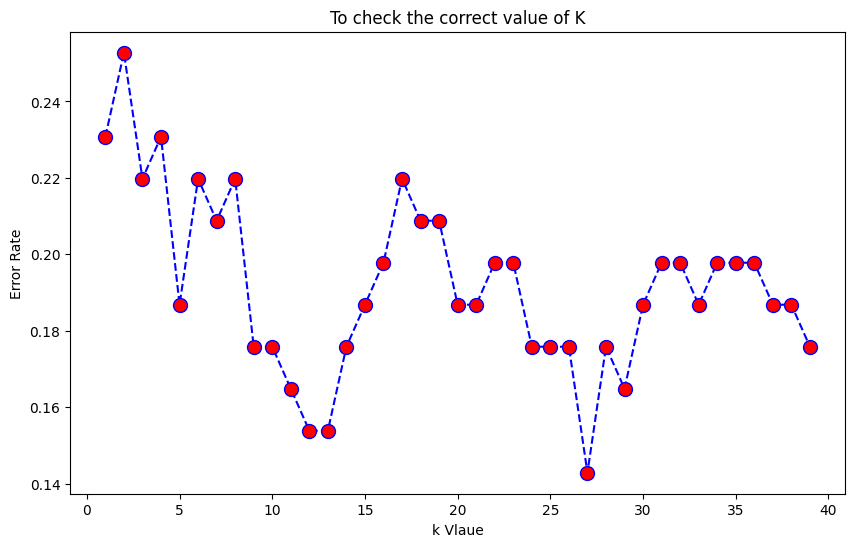

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.xlabel('k Vlaue')
plt.ylabel('Error Rate')
plt.title('To check the correct value of K')
plt.show()

In [52]:
KNN = KNeighborsClassifier(n_neighbors=12)
KNN.fit(x_train,encoded_y)
y_pred_KNN = KNN.predict(x_test)

In [53]:
KNN_conf_matrix = confusion_matrix(encoded_ytest,y_pred_KNN)
KNN_acc_score = accuracy_score(encoded_ytest,y_pred_KNN)

In [54]:
KNN_conf_matrix 

array([[35,  9],
       [ 5, 42]])

In [55]:
KNN_acc_score*100

84.61538461538461

In [56]:
from sklearn import svm
SVM = svm.SVC()
SVM.fit(x_train,encoded_y)
y_pred_SVM = SVM.predict(x_test)

In [57]:
SVM_conf_matrix = confusion_matrix(encoded_ytest,y_pred_SVM)
SVM_acc_score = accuracy_score(encoded_ytest,y_pred_SVM)

In [58]:
SVM_conf_matrix 

array([[34, 10],
       [ 8, 39]])

In [59]:
SVM_acc_score*100

80.21978021978022

In [60]:
model_acc = pd.DataFrame({'Model':['Logistic regression','Decision Tree','Random Forest','K-Nearest Neighbour','SVM'],'Accuracy':[lr_acc_score,DT_acc_score,RF_acc_score,KNN_acc_score,SVM_acc_score]})

In [61]:
model_acc = model_acc.sort_values(by='Accuracy',ascending=False)


In [62]:
model_acc

,Model,Accuracy
0,Logistic regression,0.857143
3,K-Nearest Neighbour,0.846154
4,SVM,0.802198
2,Random Forest,0.791209
1,Decision Tree,0.703297


# Adaboost Classifiers

In [63]:
from sklearn.ensemble import AdaBoostClassifier

In [64]:
ADB = AdaBoostClassifier(estimator=SVM,n_estimators=100,algorithm='SAMME',learning_rate=0.01,random_state=0)

In [65]:
ADB.fit(x_train,encoded_y)
y_pred_ADB = ADB.predict(x_test)

In [66]:
ADB_conf_matrix = confusion_matrix(encoded_ytest,y_pred_ADB)
ADB_acc_score = accuracy_score(encoded_ytest,y_pred_ADB)

In [67]:
ADB_conf_matrix

array([[ 0, 44],
       [ 0, 47]])

In [68]:
ADB_acc_score*100

51.64835164835166

# Grid Search CV

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
model_acc

,Model,Accuracy
0,Logistic regression,0.857143
3,K-Nearest Neighbour,0.846154
4,SVM,0.802198
2,Random Forest,0.791209
1,Decision Tree,0.703297


# Logistic Regression

In [71]:
param_grid = {
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'penalty': ['none','l1','l2','elasticnet'],
    'C': [100,10,1.0,0.1,0.01]
}

In [72]:
Grid = GridSearchCV(LogisticRegression(),param_grid)

In [73]:
Grid.fit(x_train,encoded_y)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [74]:
Grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

In [75]:
LR = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [76]:
LR.fit(x_train,encoded_y)

LogisticRegression(C=0.01, solver='liblinear')

In [77]:
y_pred_LR = LR.predict(x_test)

In [78]:
LR_conf_matrix = confusion_matrix(encoded_ytest,y_pred_LR)
LR_acc_score = accuracy_score(encoded_ytest,y_pred_LR)

In [79]:
LR_conf_matrix 

array([[33, 11],
       [ 6, 41]])

In [80]:
LR_acc_score *100

81.31868131868131

# Auto ML (EVAL ML)

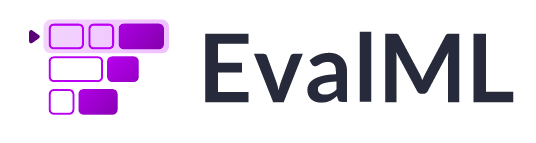

##### EVAL ML, also known as Evaluating Machine Learning Models, is a process or framework that involves assessing the performance and effectiveness of machine learning models. It aims to measure the quality of predictions made by these models and understand their capabilities and limitations.

#####The evaluation of machine learning models is crucial because it helps in determining whether a model is suitable for a particular task or problem. It allows data scientists and practitioners to compare different models, select the most appropriate one, and make informed decisions based on the model's performance.

##### The evaluation process typically involves the following steps:

#### Data Preparation:
###### Preparing the dataset by cleaning, preprocessing, and splitting it into training and testing sets. This step ensures that the data is in a suitable format for model training and evaluation.

###### Model Training: Training the machine learning model using the training dataset. This step involves feeding the model with input data and corresponding output labels to learn patterns and make predictions.

#### Model Evaluation: 
###### Assessing the performance of the trained model using the testing dataset. Various evaluation metrics are used to measure how well the model performs on unseen data. Common evaluation metrics include accuracy, precision, recall, F1 score, and area under the receiver operating characteristic curve (AUC-ROC).

#### Hyperparameter Tuning:
###### Adjusting the hyperparameters of the model to optimize its performance. Hyperparameters are parameters that are not learned from the data but are set by the data scientist, such as learning rate, regularization strength, or the number of hidden units in a neural network.

#### Cross-Validation: 
###### Performing cross-validation to further evaluate the model's performance. Cross-validation involves splitting the dataset into multiple subsets (folds) and iteratively training and evaluating the model on different combinations of these subsets. It provides a more robust estimate of the model's performance.

#### Comparison and Selection: 
###### Comparing the performance of different models and selecting the best-performing one based on the evaluation results. This step helps in choosing the most suitable model for the specific problem or application.

In [81]:
DF = pd.read_csv('/content/drive/MyDrive/Data Science Projects/Heart Attack Risk Prediction/heart.csv')

In [82]:
DF.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [83]:
# !pip install evalml
# !pip install scikit-learn==0.24.2